In [28]:
import csv
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import matthews_corrcoef as MC
from sklearn.metrics import ConfusionMatrixDisplay as CMD
from sklearn.metrics import f1_score as f1
import matplotlib.pyplot as plt
from collections import Counter as Cnt
import geopandas as gpd
import pickle
import pandas as pd
import json
import random
import Utils
import numpy as np
import folium
import geopandas as gpd

plt.style.use('ggplot')


https://public.opendatasoft.com/explore/dataset/georef-world-country-millesime/export/?disjunctive.cntry_code&disjunctive.cntry_name_en

geojson world map


In [33]:
with open("../../country_data_final.pickle", 'rb') as handle:
    data = pickle.load(handle)
with open("../../mapillary/train.json") as file:
    metadata = json.load(file)
with open("../pickles/country_to_region.json") as file:
    region_to_country = json.load(file)
    
geo_json_path = "../SHP/georefworld.geojson"


In [107]:
# result_file = "country100_region_results.csv"
result_file = "country100_results.csv"
# result_file =  "US_states_max100_results.csv"
result_file = "city300_results.csv"



In [108]:
result_file[:-12]

'city300'

In [110]:
gold, predicts, probs, filenames = Utils.read_resultcsv(result_file)
predict = [x[0] for x in predicts]
with open(f"../label_counts/{result_file[:-12]}_labelcount.json",encoding="utf-8") as file:
    label_counts = json.load(file)

Text(0.5, 1.0, 'f1 scores for country100')

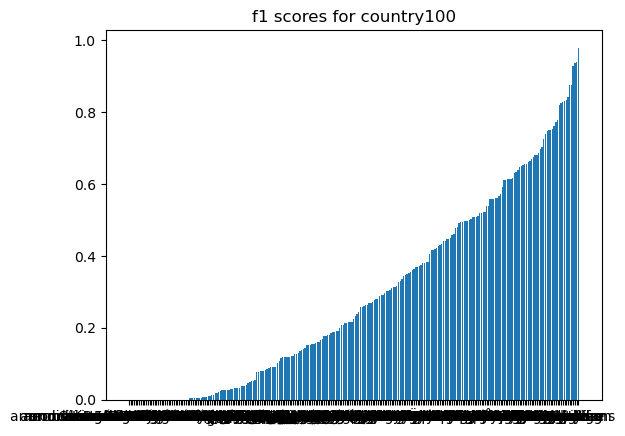

In [111]:
labels = list(set(gold))
f1scores = f1(gold,predict,labels=labels,average=None)
comb = list(zip(f1scores,labels))
comb.sort()
f1scores,labels=zip(*comb)
plt.bar(labels,f1scores)
plt.yticks(np.arange(0, 1.2, 0.2));
plt.xticks();

plt.title("f1 scores for country100") 


In [112]:
labels[0:100:10]

("'s-Hertogenbosch",
 'Ito',
 'Pomerode',
 'arrondissement de Bni Makada بني مكادة',
 'Goiânia',
 'Kameoka',
 'Ayacucho',
 'Sydney',
 'João Pessoa',
 'Jablonov nad Turňou')

In [ ]:
countrydf = gpd.read_file("../SHP/CountrySHP/world-administrative-boundaries.shp", encoding="utf-8")

In [40]:
converter = json.load(open('../country_converter.json'))
map_to_folium = {val:key for key,val in converter.items()}

In [44]:
f1scoredf = pd.DataFrame({'countries':labels, 'f1':f1scores});
f1scoredf.replace({"countries": map_to_folium});

,countries,f1
0,Côte d'Ivoire,0.000000
1,Georgia,0.000000
2,Kuwait,0.000000
3,North Macedonia,0.056180
4,Myanmar,0.056604
...,...,...
110,Japan,0.888889
111,Ireland,0.892019
112,New Zealand,0.895238
113,Australia,0.898551


In [47]:
countrydf;

In [ ]:
# fmap = folium.Map(location = [56, 10], zoom_start = 7)
# folium.GeoJson(geo_json_path, name = "geojson").add_to(fmap)

# folium.Choropleth(
#     geo_data = geo_json_path,
#     name = "cases",
#     data = f1scoredf,
#     columns = ["countries", "f1"],
#     key_on = "properties.iso_3166_1",
#     fill_color = "OrRd",
#     fill_opacity = 0.7,
#     line_opacity = 0.2,
#     legend_name = "F1 Score",
# ).add_to(fmap)

In [50]:
fmap;


In [113]:
label_counts = [(val,key) for key,val in label_counts.items()]
label_counts.sort()
label_counts_15 = [*label_counts[:5],*label_counts[55:60],*label_counts[-5:]]
label_counts_15 = [(key,value[1:]) for key,value in label_counts_15]

In [114]:
label_counts_15
#goldsel, predsel = Utils.filter_classes(gold,predict,selection)

[(0, "arrondissement d'aîn-chock مقاطعة عين الشق"),
 (0, "arrondissement d'el maarif مقاطعة المعاريف"),
 (0, "arrondissement d'el mariniyine المرينيين"),
 (0, 'arrondissement de bni makada بني مكادة'),
 (0, 'arrondissement de charf-souani الشرف السواني'),
 (132, 'santa cruz de la sierra'),
 (134, 'santo antónio'),
 (138, 'goiânia'),
 (143, 'rancagua'),
 (147, 'minamisoma'),
 (733129, 'washington'),
 (1413171, 'cali'),
 (1722496, 'orange'),
 (1732357, 'new york'),
 (2047928, 'york')]

In [96]:
label_counts_15_selection = ["North Macedonia","Côte d'Ivoire",'Czechia','Comoros','Democratic Republic of the Congo',"Finland","Qatar","Denmark","Cambodia","Ethiopia","France","Australia","Japan","China","India"]

In [97]:
goldsel,predsel = Utils.filter_classes(gold,predict,label_counts_15_selection)

In [98]:
def translate(ls,frm,to):
    new_ls = []
    for x in ls:
        if x == frm:
            new_ls.append(to)
        else:
            new_ls.append(x)
    return new_ls
    

In [99]:
frm = 'Democratic Republic of the Congo'
to = "DR Congo"
goldsel,predsel = translate(goldsel,frm,to), translate(predsel,frm,to)
label_counts_15_selection = translate(label_counts_15_selection,frm,to)

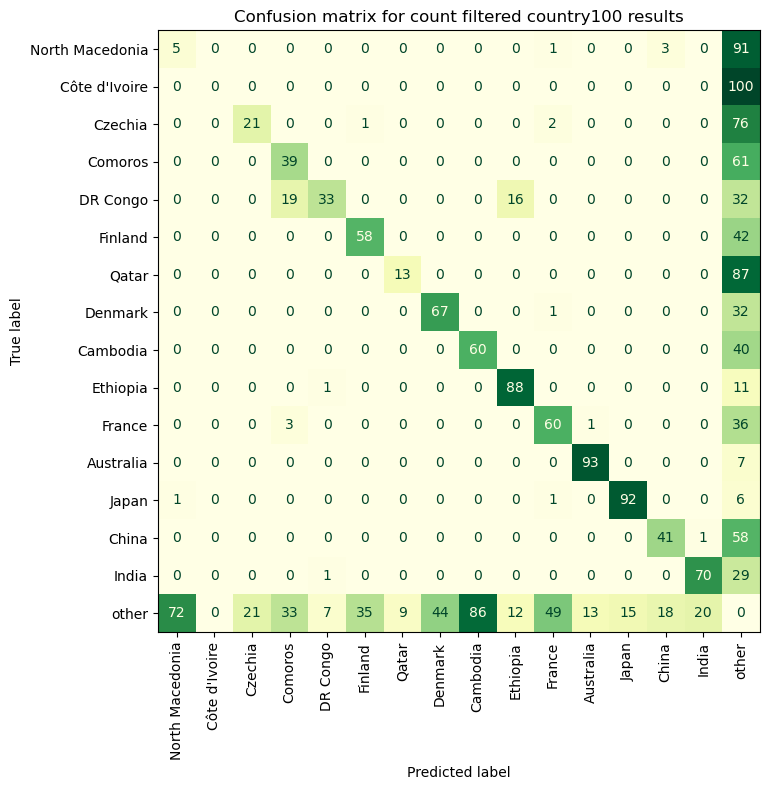

In [106]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8, 8))

CMD.from_predictions(goldsel,predsel,xticks_rotation="vertical", ax=ax,labels=label_counts_15_selection+["other"],cmap="YlGn",colorbar=False)
plt.title("Confusion matrix for count filtered country100 results")
plt.tight_layout()
plt.savefig("../figures/country100_15filt_CM.png")

<Figure size 640x480 with 0 Axes>